In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
%load_ext rpy2.ipython
%R library(ggplot2)

R[write to console]: Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang



array(['ggplot2', 'tools', 'stats', 'graphics', 'grDevices', 'utils',
       'datasets', 'methods', 'base'], dtype='<U9')

In [23]:
df = pd.read_csv('../data/historical/Batting.csv')
games = pd.read_csv('../data/historical/Teams.csv')

In [4]:
games = games[['yearID', 'teamID', 'G']]

In [5]:
game_gr = games.groupby('yearID').sum().reset_index()
gr = df.groupby('yearID').sum().reset_index().drop('G', axis = 1)
join = pd.merge(gr, game_gr, on = 'yearID', how = 'left')

In [6]:
join['r_G'] = join.R / join.G
join['hr_G'] = join.HR / join.G

In [12]:
era = join.loc[(join.yearID > 1987) ]
era['steroidFlag'] = np.where(era.yearID < 1993, 'no', 'yes')

In [52]:
era.groupby('steroidFlag').agg('mean')[['hr_G']]
(1.048333 - 0.760441)/0.760441

0.37858558389145236

In [45]:
%R -i era 

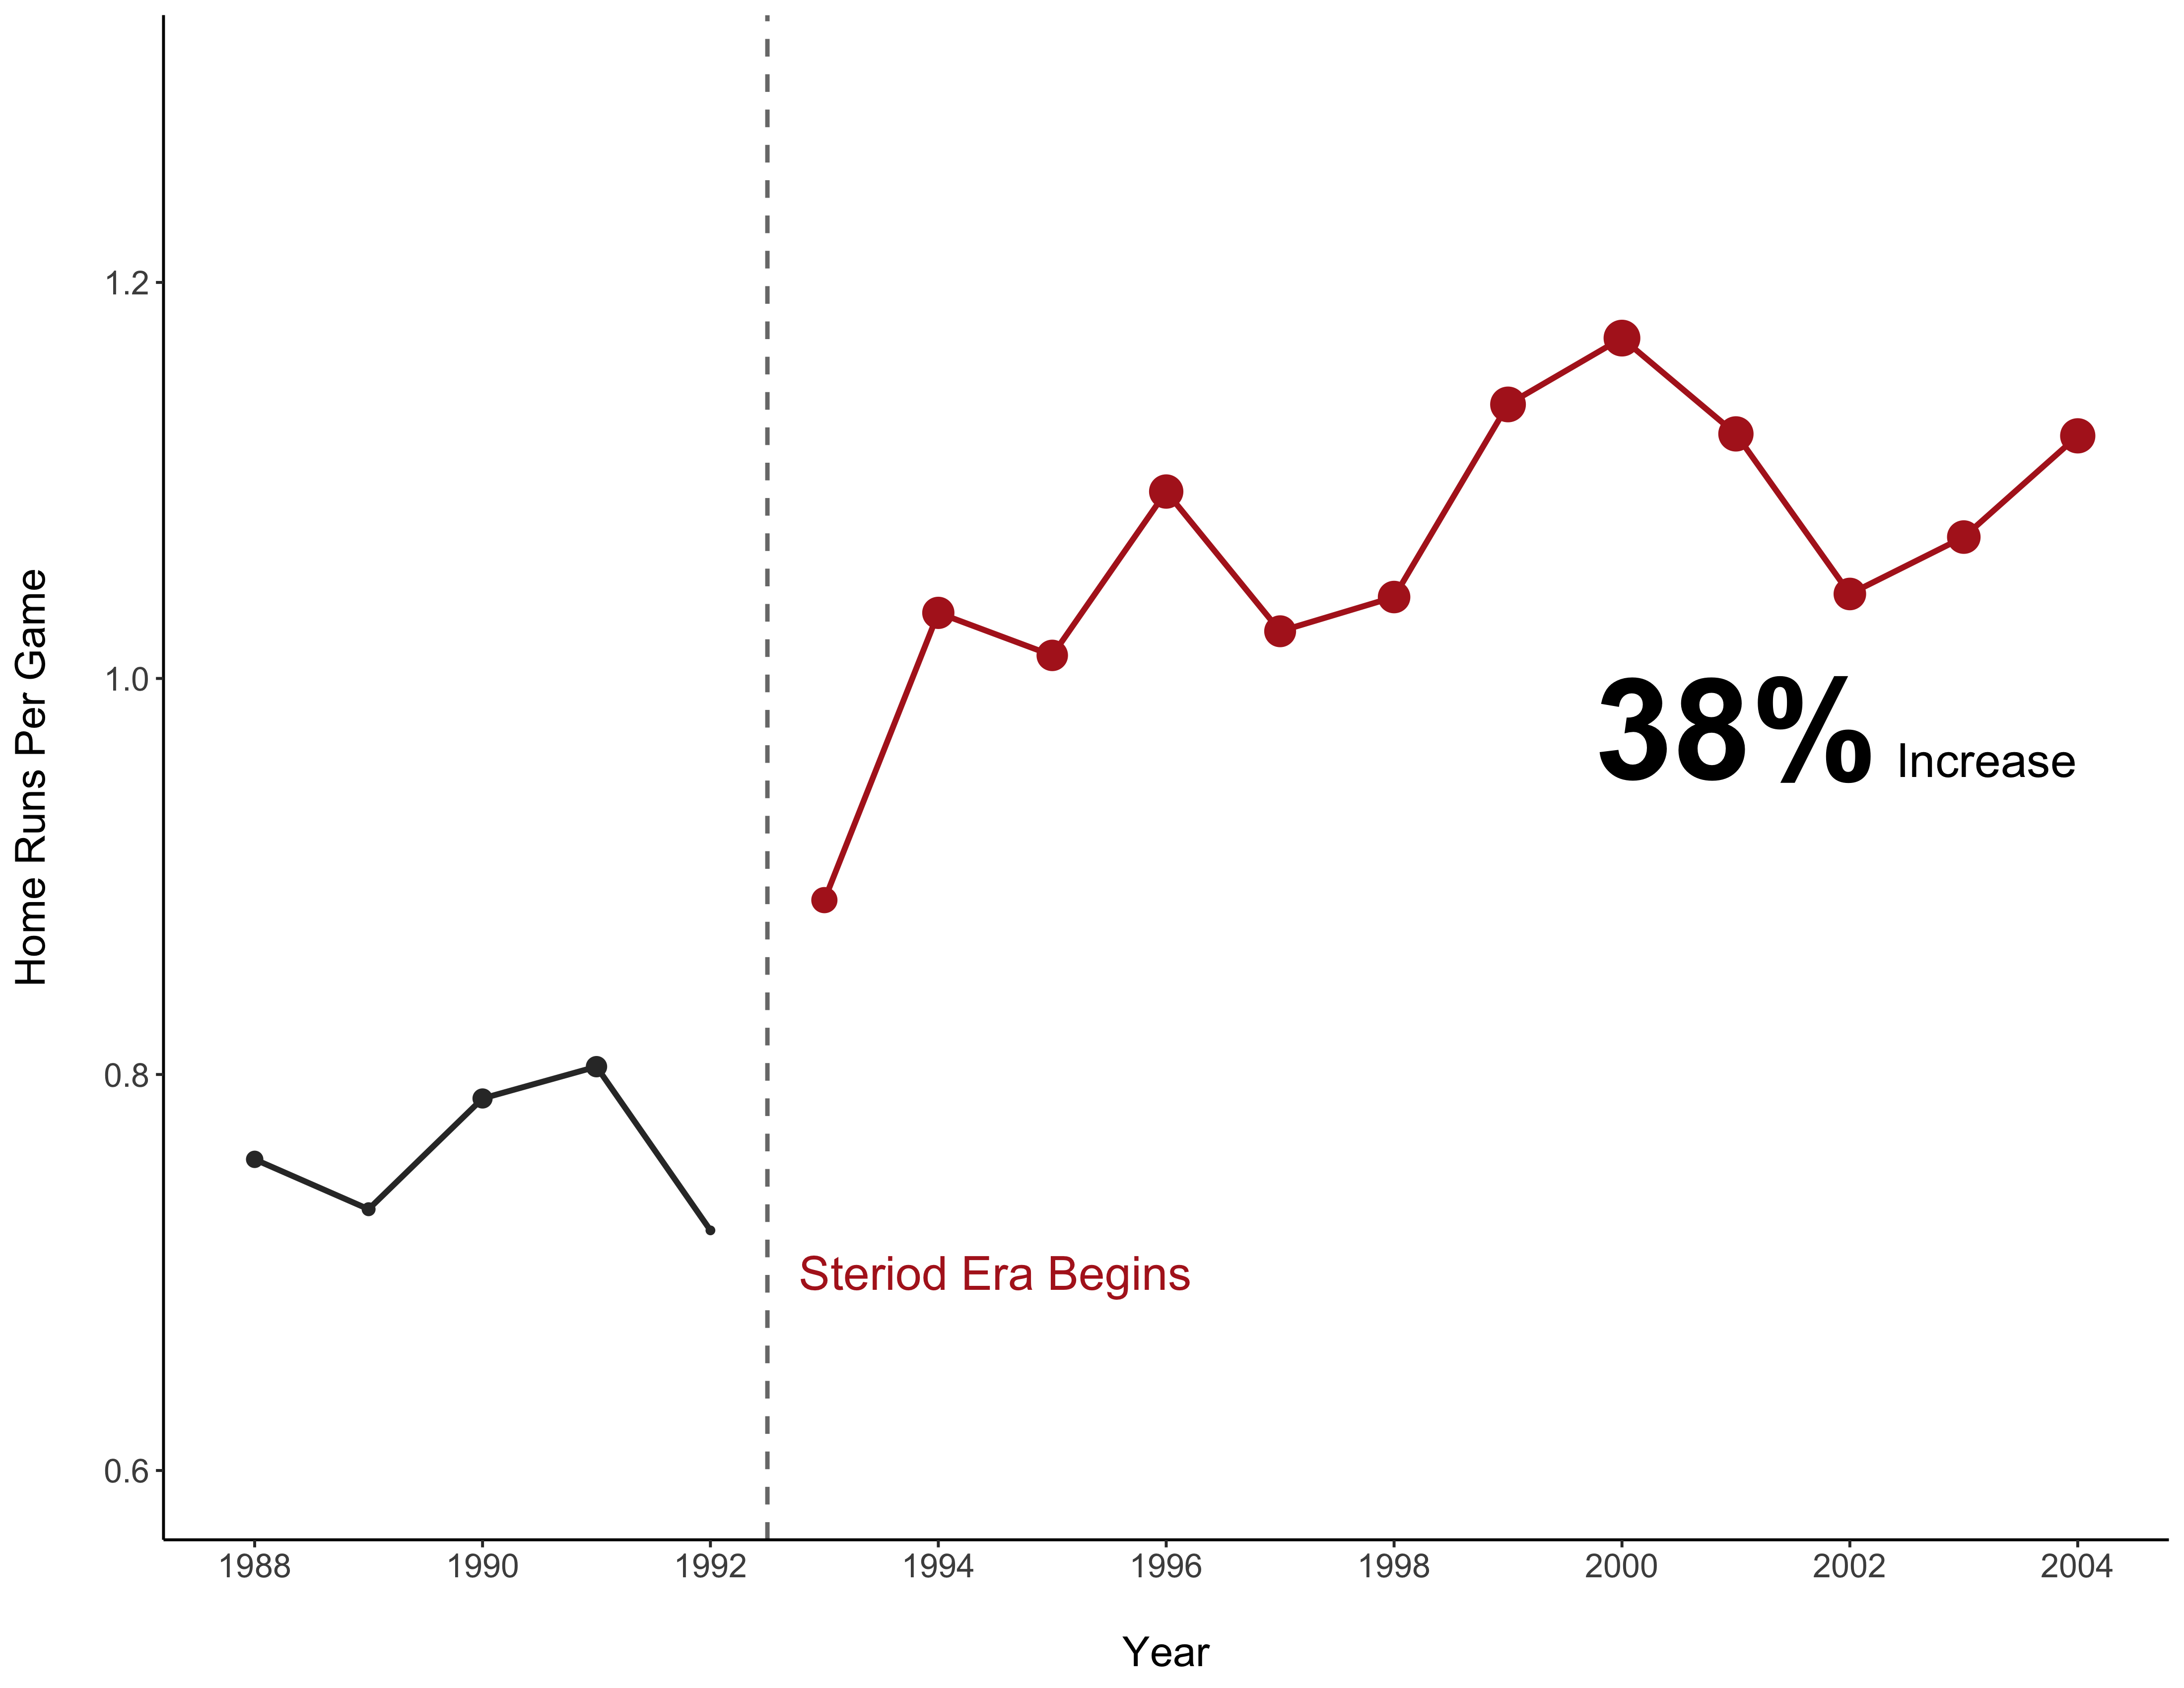

In [91]:
%%R -w 11 -h 8.5 --units in -r 400

ggplot() +
    geom_point(aes(x = yearID, y = hr_G, color = steroidFlag, size = hr_G), data = era) +
    geom_line(aes(x = yearID, y = hr_G, color = steroidFlag), size = 1,  data = era) +
    geom_vline(aes(xintercept = 1992.5), linetype = 2, alpha = 0.6, size = 0.75) +
    annotate("text", x = 1994.5, y = 0.7, size = 6, color = 'firebrick',
                label = "Steriod Era Begins") +
    annotate("text", x = 2001, y = 0.975, size = 18, color = 'black',
                label = "38%", fontface = 'bold') +
    annotate("text", x = 2003.2, y = 0.959, size = 6,label = "Increase") +
    scale_color_manual(values = c('gray20', 'firebrick')) +
    scale_x_continuous(limits = c(1988, 2004), breaks = seq(1988, 2004, by = 2)) +
    scale_y_continuous(limit = c(0.6, 1.3), breaks = seq(0.6, 1.3, by = 0.2)) +
    xlab('\nYear') +
    ylab('Home Runs Per Game\n') +
    theme_classic() +
    guides(color = F, size = F) +
    theme(text = element_text(size = 15))

In [92]:
%R ggsave('../images/era.pdf', units = 'in', width = 11, height = 8.5, dpi = 400)